<a href="https://colab.research.google.com/github/Nikhileswar-Komati/100D_ML/blob/master/Algorithms/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class KNNClassifier:

  def __init__(self, k = 3):
    self.k = k
    self.distances = {}
    self.predictions = []

  def fit(self, train_X, train_Y):
    self.train_X = train_X
    self.train_Y = train_Y
    self.length = train_X.shape[0]
    return self
  
  def predict(self, test_X):
    for indx in range(test_X.shape[0]):
      distance_from_test = self.get_eucledian_distance(test_X[indx])
      k_nearest_neighbors = [indx[1] for indx in distance_from_test[:self.k]]
      self.distances[indx] = k_nearest_neighbors
      self.predictions.append(max([self.train_Y[neighbor] for neighbor in k_nearest_neighbors]))
    return np.array(self.predictions)
  
  def get_eucledian_distance(self, test_sample):
    distance_from_sample = []
    for train_indx in range(self.length):
      distance_from_sample.append([np.sum((self.train_X[train_indx] - test_sample) ** 2) ** 0.5, train_indx])
    return sorted(distance_from_sample)




In [56]:
iris = load_iris()
X = iris.data
Y = iris.target
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2)
print(train_X.shape, test_X.shape)

(120, 4) (30, 4)


In [57]:
clf = KNNClassifier(k = 5)
clf.fit(X, Y)
pred_Y = clf.predict(test_X)
print(accuracy_score(test_Y, pred_Y))
print(confusion_matrix(test_Y, pred_Y))

0.9666666666666667
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]


In [79]:
clf = KNeighborsClassifier(n_neighbors=23)
clf.fit(X, Y)
pred_Y = clf.predict(test_X)
print(accuracy_score(test_Y, pred_Y))
print(confusion_matrix(test_Y, pred_Y))

0.9666666666666667
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]


In [66]:
acc_rate = []
err_rate = []
for k_val in range(1, 40):
  clf = KNeighborsClassifier(n_neighbors = k_val)
  cv = cross_val_score(clf, X, Y, cv = 10, scoring = 'accuracy')
  acc_rate.append(cv.mean())
  err_rate.append(1 - cv.mean())


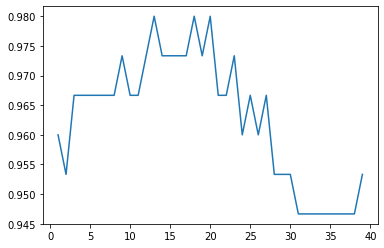

In [71]:
sns.lineplot(x = range(1, 40), y = acc_rate, markers = True)

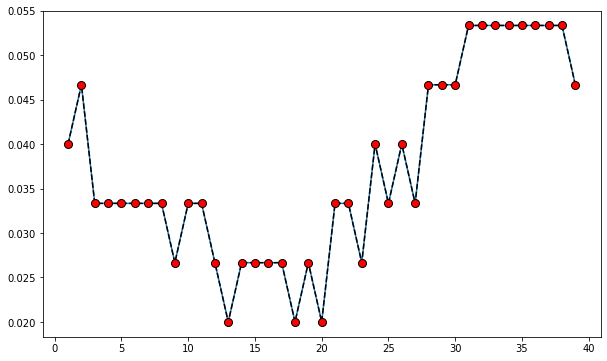

In [89]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), err_rate,color = 'black', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 8)

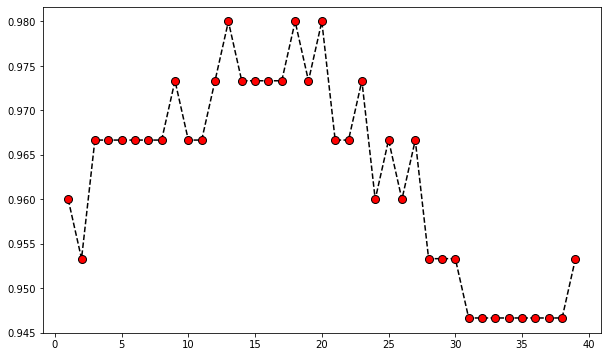

In [91]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), acc_rate,color = 'black', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 8)